# FLOWER RECOGNITION SYSTEM USING CNN

# UPLOAD DATASET

In [24]:
import os
print(os.listdir('D:/flowers-recognition/flowers/DATA'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


# UPLOADING EACH FLOWER

In [25]:
X=[]   # array for getting images 
Z=[]   # array for getting lable
IMG_SIZE=150
daisy='D:/flowers-recognition/flowers/DATA/daisy'
sunflower='D:/flowers-recognition/flowers/DATA/sunflower'
tulip='D:/flowers-recognition/flowers/DATA/tulip'
dandelion='D:/flowers-recognition/flowers/DATA/dandelion'
rose='D:/flowers-recognition/flowers/DATA/rose'

# TYPE OF FLOWER

In [26]:
def assign_label(img,flower_type):
    return flower_type

# PRE-PROCESSING

In [27]:
import cv2
import numpy as np
def train_data(flower_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)  # taking images from the directory defined
        img = cv2.imread(path,cv2.IMREAD_COLOR) # convert tha rgb image into grayscale
        #img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)  
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))  # resizing the images
        
        X.append(np.array(img))
        Z.append(str(label))

# TRAINING OF DATA

In [28]:
train_data('daisy',daisy)
print(len(X))

769


In [29]:
train_data('Sunflower',sunflower)
print(len(X))

1503


In [30]:
train_data('Tulip',tulip)
print(len(X))

2487


In [31]:
train_data('dandelion',dandelion)
print(len(X))

3539


In [32]:
train_data('Rose',rose)
print(len(X))

4323


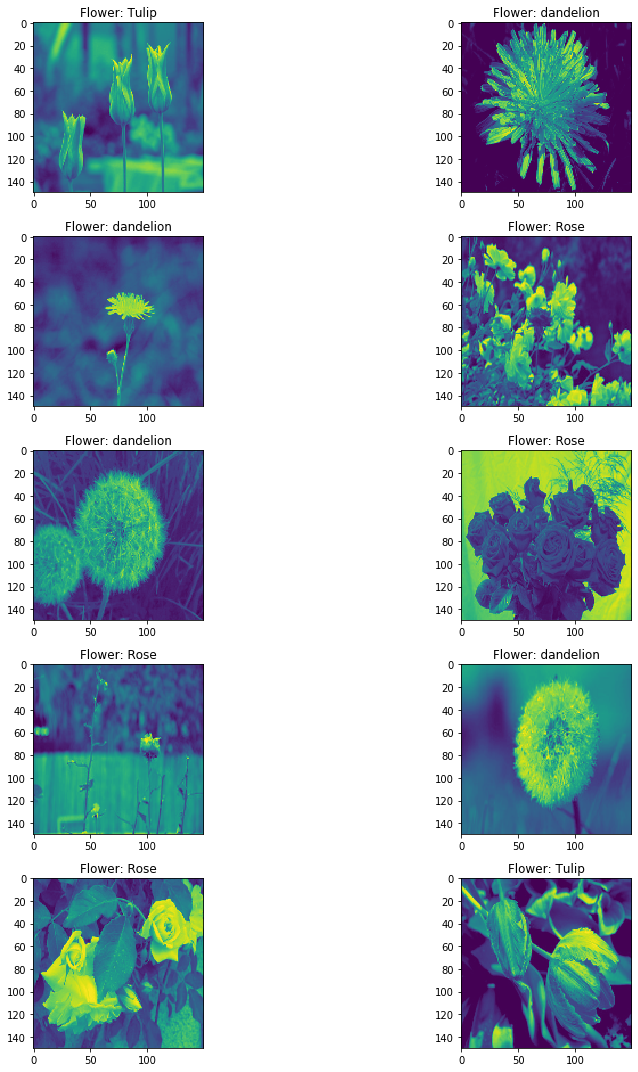

In [33]:
import matplotlib.pyplot as plt
import random as rn
fig,ax=plt.subplots(5,2) # plotting each flower
fig.set_size_inches(15,15) # figure height and width is set though image is 150
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z)) # it will generate flower labels randomly
        ax[i,j].imshow(X[l])   # getting images
        ax[i,j].set_title('Flower: '+Z[l])  # getting images and assigning labels
        
plt.tight_layout()
plt.show()   # plotting the images

In [34]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

# TRAINING AND TESTING

In [35]:
from sklearn.model_selection import train_test_split   # we are not dividing our datset manually 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# LENGTH OF TRAINING DATA

In [45]:
print(len(x_train),(y_train))

3242 [[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


# LENGTH OF TESTING DATA

In [44]:
print(len(x_test),(y_test))

1081 [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


# SHAPE OF DATA

In [41]:
print("Train data shape: {}".format(x_train.shape))
print("testing/validation data shape: {}".format(x_test.shape))

Train data shape: (3242, 150, 150)
testing/validation data shape: (1081, 150, 150)


# CONVOLUTIONAL NEURAL NETWORK

In [40]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense
input_shape = (150,150,3) #image width and hieght and 3rd is about filters
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # reduce the number of parameters

model.add(Conv2D(filters = 64,kernel_size = (3,3), activation='relu')) # relu to convert the negative values as non-negative
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2))) #Stride is the number of pixels shifts over the input matrix.
model.add(Dropout(0.4))

model.add(Conv2D(filters = 96 , kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 96 , kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax")) #apply Softmax function to classify an object with probabilistic values between 0 and 1(like a flower image or not)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 96)        55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 96)       

# ACCURACY

In [81]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size = 64) # (number of times we are going to scan our whole training data)

Train on 3242 samples, validate on 1081 samples
Epoch 1/50
3242/3242 [==============================] - 147s 45ms/step - loss: 1.6498 - accuracy: 0.2705 - val_loss: 1.5418 - val_accuracy: 0.2923
Epoch 2/50
3242/3242 [==============================] - 116s 36ms/step - loss: 1.3126 - accuracy: 0.4167 - val_loss: 1.1917 - val_accuracy: 0.4653
Epoch 3/50
3242/3242 [==============================] - 122s 38ms/step - loss: 1.1352 - accuracy: 0.5157 - val_loss: 1.1008 - val_accuracy: 0.5365
Epoch 4/50
3242/3242 [==============================] - 108s 33ms/step - loss: 1.0399 - accuracy: 0.5725 - val_loss: 1.2222 - val_accuracy: 0.5069
Epoch 5/50
3242/3242 [==============================] - 113s 35ms/step - loss: 0.9907 - accuracy: 0.5919 - val_loss: 1.0673 - val_accuracy: 0.5671
Epoch 6/50
3242/3242 [==============================] - 116s 36ms/step - loss: 0.9096 - accuracy: 0.6382 - val_loss: 1.1187 - val_accuracy: 0.5754
Epoch 7/50
3242/3242 [==============================] - 107s 33ms/step

Our Training Accuracy comes out to be 98.27% and our Validation Accuracy comes out to be 70.21% which is good.

# PREDICTION

In [82]:
prediction=model.predict(x_test)
prediction_digits=np.argmax(pred,axis=1)

# FLOWER CLASSES

In [92]:
i=0   # starts from 0
proper_class=[]    # array for maintaining the trained fower
misclassified_class=[] # array for maintaining the testing flower

for i in range(len(y_test)):    
    if(np.argmax(y_test[i])==prediction_digits[i]):
        proper_class.append(i)
    if(len(proper_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==prediction_digits[i]):
        misclasified_class.append(i)
    if(len(misclassified_class)==8):
        break

# CLASSIFICATION

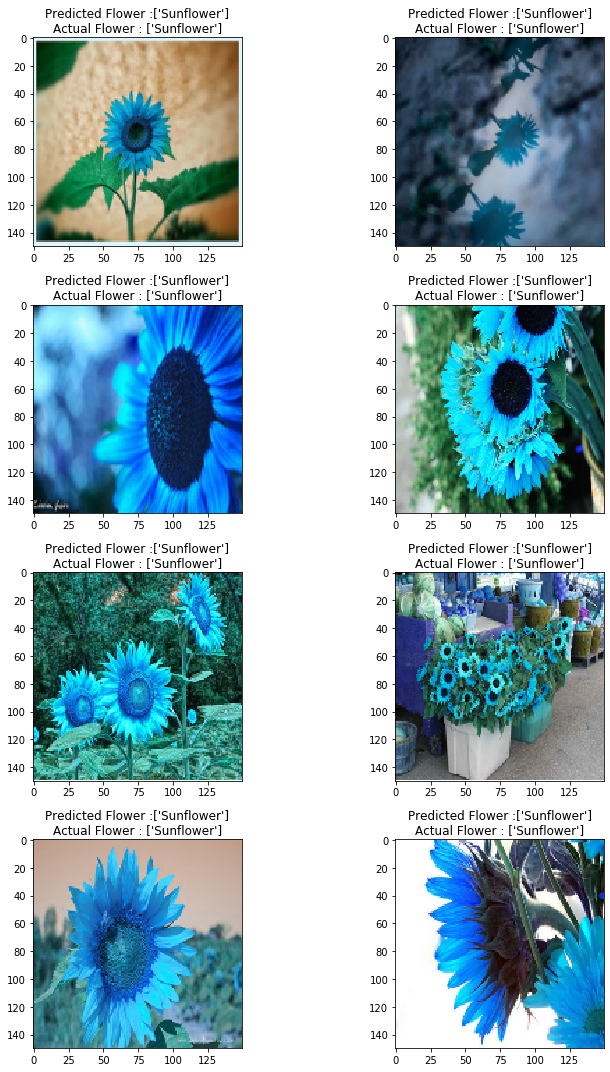

In [93]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[proper_class[count]]) #it will count the each flower
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([prediction_digits[proper_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[proper_class[count]])])))
        plt.tight_layout()
        count+=1

So, the flower images are recognised correctly